In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_Bangalore = pd.read_csv('Employee.csv')
df.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [64]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [65]:
df['City'].value_counts()

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

# KMeans Clustering algorithm

In [74]:
df_Bangalore_Cont =df_Bangalore [['PaymentTier', 'ExperienceInCurrentDomain']]
df_Bangalore_Cont.head(3)

,PaymentTier,ExperienceInCurrentDomain
0,3,0
1,1,3
2,3,2


In [75]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss = ss.fit_transform(df_Bangalore_Cont)

In [87]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(ss)
    wcss.append(kmeans.inertia_)

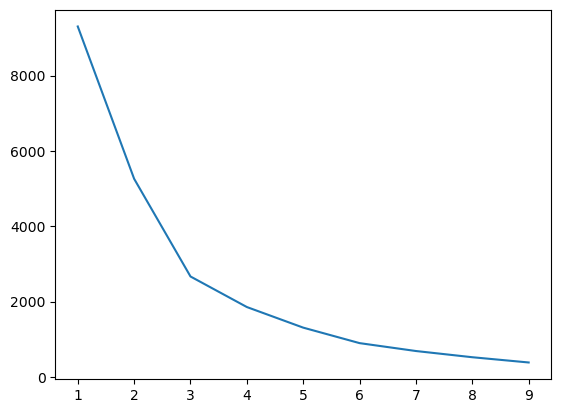

In [88]:
plt.plot(range(1,10),wcss)

In [89]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(ss)


df_Bangalore['Cluster'] = clusters


cluster_dataframes = [df_Bangalore[df_Bangalore['Cluster'] == i] for i in range(4)]

In [90]:
cluster_dataframes

[      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
 3       Masters         2016  Bangalore            3   27    Male          No   
 10      Masters         2012  Bangalore            3   27    Male          No   
 11    Bachelors         2016       Pune            3   34    Male          No   
 12    Bachelors         2018       Pune            3   32    Male         Yes   
 14    Bachelors         2012  Bangalore            3   37    Male          No   
 ...         ...          ...        ...          ...  ...     ...         ...   
 4643  Bachelors         2013  Bangalore            3   31  Female          No   
 4646  Bachelors         2013  Bangalore            3   25  Female          No   
 4648  Bachelors         2013  Bangalore            3   26  Female          No   
 4650    Masters         2018  New Delhi            3   27    Male          No   
 4652  Bachelors         2015  Bangalore            3   33    Male         Yes   
 
       Experie

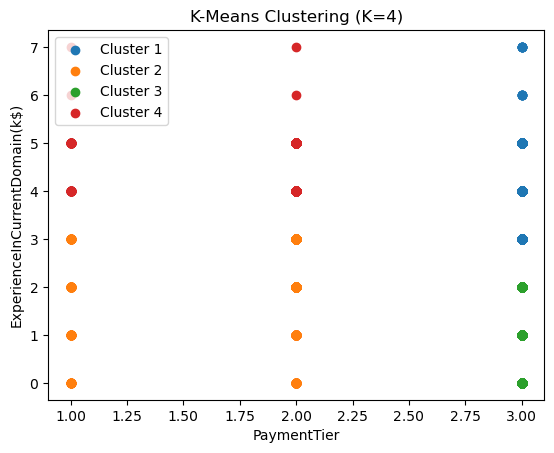

In [91]:
for i, cluster_df in enumerate(cluster_dataframes):
    plt.scatter(cluster_df['PaymentTier'], cluster_df['ExperienceInCurrentDomain'], label=f'Cluster {i + 1}')

plt.xlabel('PaymentTier')
plt.ylabel('ExperienceInCurrentDomain(k$)')
plt.title('K-Means Clustering (K=4)')
plt.legend()
plt.show()

In [92]:
diff_wcss = []

for i in range(0,10):
    diff_wcss.append(wcss[i]-wcss[i+1])
    
diff_wcss

IndexError: list index out of range

In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2,9):
    KM = KMeans(n_clusters = i,random_state = 1)
    KM.fit(ss)
    labels = KM.labels_
    print(silhouette_score(ss,labels, random_state = 1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5258380822325687


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.579547488883021


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6079627396008264


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6419516461101411


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6746280390653981


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7017094757809681


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.7382593724034113


In [93]:
mod2 = KMeans(n_clusters = 2)
mod2 = mod2.fit(ss)

df_Bangalore['Clusters'] = mod2.labels_

df_Bangalore.head()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Cluster,Clusters
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,2,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1,1,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1,0,0
4,Masters,2017,Pune,3,24,Male,Yes,2,1,2,0


In [94]:
centroids = mod2.cluster_centers_
centroids

array([[ 0.53750299,  0.00725304],
       [-1.61667567, -0.02181535]])

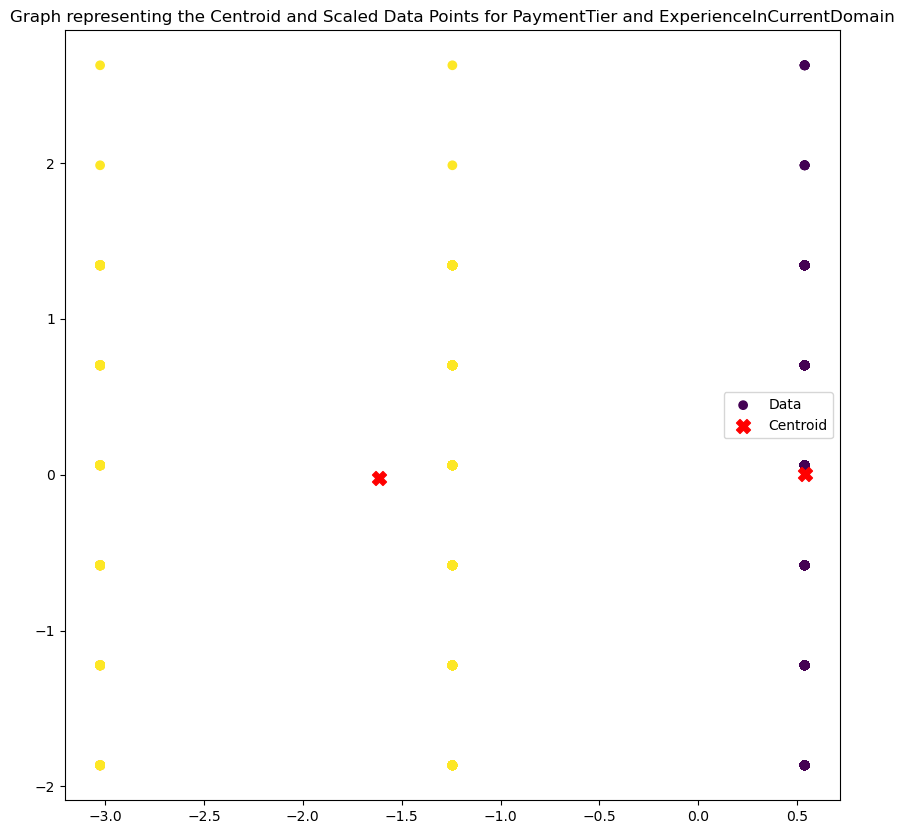

In [95]:
plt.figure(figsize = (10,10))

plt.scatter (ss[:, 0], ss[:, 1], c =  df_Bangalore['Clusters'], cmap = 'viridis')

plt.scatter(centroids[:,0], centroids [:,1], marker = 'X', s = 100, c = 'red', label = 'Centroids')

plt.legend(['Data', 'Centroid'])
plt.title('Graph representing the Centroid and Scaled Data Points for PaymentTier and ExperienceInCurrentDomain')
plt.show()